# Configurações para o ambiente de execução, kernel, etc (bem complicadinho hein!!!)

https://stackoverflow.com/questions/58119823/jupyter-notebooks-in-visual-studio-code-does-not-use-the-active-virtual-environm

https://anbasile.github.io/posts/2017-06-25-jupyter-venv/

# Leitura dos dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
caminho2019 = "..\dados\obitos-2019.csv"
caminho2020 = "..\dados\obitos-2020.csv"

dados2019 = pd.read_csv(caminho2019)
dados2020 = pd.read_csv(caminho2020)

dados2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [3]:
len(dados2019["uf"].unique())

27

In [4]:
len(dados2020["uf"].unique())

27

In [5]:
dados2019["tipo_doenca"].value_counts()

OUTRAS                        3871
PNEUMONIA                     2368
INSUFICIENCIA_RESPIRATORIA    2338
SEPTICEMIA                    2083
INDETERMINADA                 1317
SRAG                           490
COVID                            1
Name: tipo_doenca, dtype: int64

In [6]:
dados2019.groupby("tipo_doenca").sum()

,total
tipo_doenca,
COVID,1
INDETERMINADA,7055
INSUFICIENCIA_RESPIRATORIA,101321
OUTRAS,665520
PNEUMONIA,227331
SEPTICEMIA,176433
SRAG,1508


In [7]:
dados2020.groupby("tipo_doenca").sum()

,total
tipo_doenca,
COVID,197889
INDETERMINADA,9840
INSUFICIENCIA_RESPIRATORIA,100176
OUTRAS,700165
PNEUMONIA,183816
SEPTICEMIA,164458
SRAG,16736


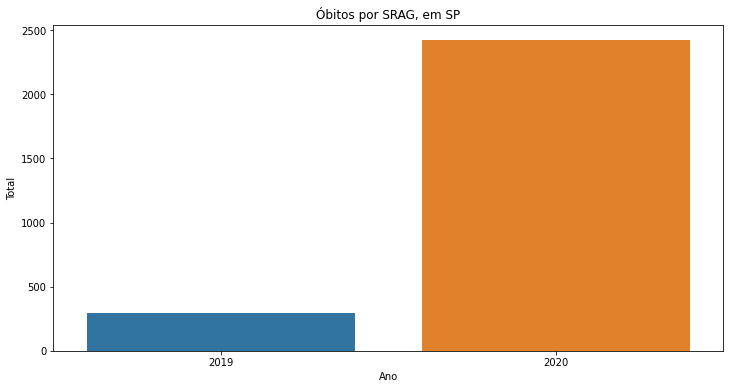

In [8]:
def graficoComparativo(dadosUm, dadosDois, causa = "todas", estado = "todos"):
    if (estado == "todos") * (causa == "todas"):
        totalUm = dados2019["total"].sum()
        totalDois = dados2020["total"].sum()
        lista = [int(totalUm), int(totalDois)]
        causa = "todas as causas"
        estado = "todos os estados"

    elif estado == "todos":
        totalUm = dadosUm.groupby(["tipo_doenca"]).sum()
        totalDois = dadosDois.groupby(["tipo_doenca"]).sum()
        lista = [int(totalUm.loc[causa]), int(totalDois.loc[causa])]
        estado = "todos os estados"

    elif causa == "todas":
        totalUm = dadosUm.groupby(["uf"]).sum()
        totalDois = dadosDois.groupby(["uf"]).sum()
        lista = [int(totalUm.loc[estado]), int(totalDois.loc[estado])]
        causa = "todas as causas"

    else:
        totalUm = dadosUm.groupby(["tipo_doenca", "uf"]).sum()
        totalDois = dadosDois.groupby(["tipo_doenca", "uf"]).sum()
        lista = [int(totalUm.loc[causa, estado]), int(totalDois.loc[causa, estado])]

    dados = pd.DataFrame({"Total": lista, "Ano": [2019, 2020]})

    plt.figure(figsize=(12,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)

    plt.title(f"Óbitos por {causa}, em {estado}")
    plt.show()

    return dados


graficoComparativo(dados2019, dados2020, causa = "SRAG", estado = "SP");

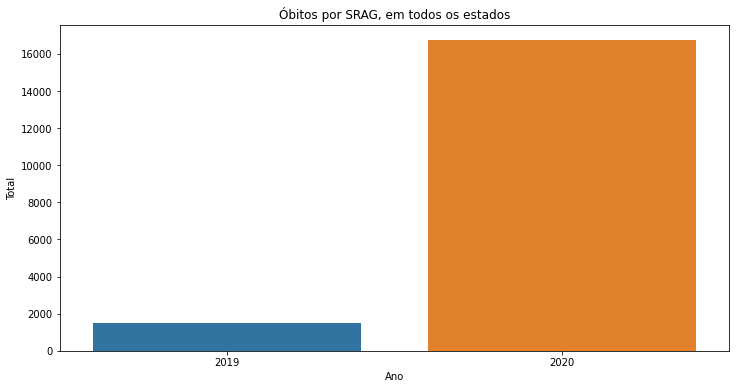

In [9]:
graficoComparativo(dados2019, dados2020, causa = "SRAG");

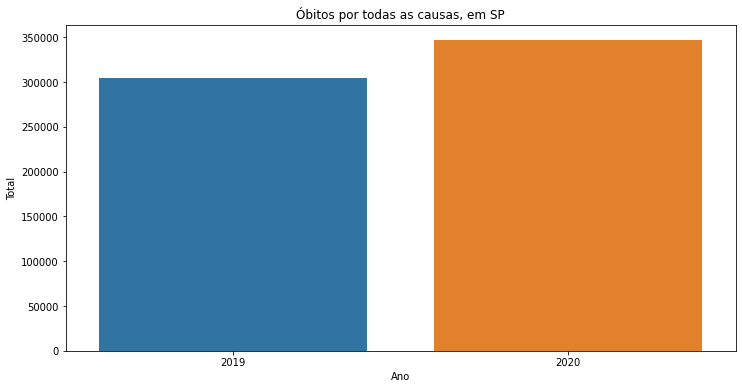

In [10]:
graficoComparativo(dados2019, dados2020, estado = "SP");

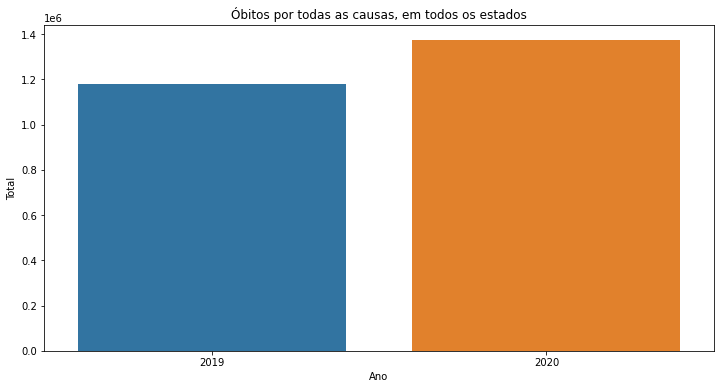

In [11]:
graficoComparativo(dados2019, dados2020);